In [1]:
# data science imports
import pandas as pd
import matplotlib.pyplot as plt

# census data imports
import censusdis.data as ced
import censusdis.maps as cem
from censusdis import states

# other imports
import os

In [2]:
# improves pandas readability
pd.set_option('display.max_columns', None)
pd.set_option("display.max_colwidth", 250)

In [3]:
# Load the API key
with open("../census_api_key.txt", "r") as f:
    CENSUS_API_KEY = f.read().strip()

# print(CENSUS_API_KEY)

## Exploring Available Census Datasets

In [4]:
# grab a list of all the available datasets
df_datasets = ced.variables.all_data_sets()
# this will show you a random sample of 5 datasets
df_datasets.sample(5)

,YEAR,SYMBOL,DATASET,TITLE,DESCRIPTION,API BASE URL
874,2012,ECN_PURELEC,ecnpurelec,Utilities: Subject Series - Misc Subjects: Cost of Purchased Electricity for Resale by Utilities for the U.S: 2012,Utilities: Subject Series - Misc Subjects: Cost of Purchased Electricity for Resale by Utilities for the U.S.: 2012.,http://api.census.gov/data/2012/ecnpurelec
1654,timeseries,None,timeseries/intltrade/imports/sitc,Time Series International Trade: Monthly U.S. Imports by Standard International Trade Classification (SITC) Code,The Census data API provides access to the most comprehensive set of data on current month and cumulative year-to-date imports using the Standard International Trade Classification (SITC) system. The SITC endpoint in the Census data API also prov...,http://api.census.gov/data/timeseries/intltrade/imports/sitc
273,1998,CPS_BASIC_NOV,cps/basic/nov,Nov 1998 Current Population Survey: Basic Monthly,"To provide estimates of employment, unemployment, and other characteristics of the general labor force, of the population as a whole, and of various subgroups of the population. Monthly labor force data for the country are used by the Bureau of L...",http://api.census.gov/data/1998/cps/basic/nov
244,1997,CPS_BASIC_FEB,cps/basic/feb,Feb 1997 Current Population Survey: Basic Monthly,"To provide estimates of employment, unemployment, and other characteristics of the general labor force, of the population as a whole, and of various subgroups of the population. Monthly labor force data for the country are used by the Bureau of L...",http://api.census.gov/data/1997/cps/basic/feb
989,2014,CPS_VETS_AUG,cps/vets/aug,Aug 2014 Current Population Survey: Veterans Supplement,"Provides data for veterans of the United States on Vietnam-theater and Persian Gulf-theater status, service-connected income, effect of a service-connected disability on current labor force participation and participation in veterans’ programs.",http://api.census.gov/data/2014/cps/vets/aug


In [5]:
# An incredible number of datasets are available
df_datasets["SYMBOL"].nunique()

311

In [6]:
# base API URL + "groups.html" to get a list of all the available groups
# example with the ACS
df_datasets[df_datasets['TITLE'].str.contains('ACS')].sort_values('YEAR', ascending=False).head()
# https://api.census.gov/data/2023/acs/acs1/groups.html

,YEAR,SYMBOL,DATASET,TITLE,DESCRIPTION,API BASE URL
1550,2023,ACSSE,acs/acsse,ACS 1-Year Supplemental Estimates,The American Community Survey (ACS) is a nationwide survey designed to provide communities a fresh look at how they are changing. The ACS replaced the decennial census long form in 2010 and thereafter by collecting long form type information thro...,http://api.census.gov/data/2023/acs/acsse
1543,2023,ACS1_SUBJECT,acs/acs1/subject,ACS 1-Year Subject Tables,The American Community Survey (ACS) is a US-wide survey designed to provide communities a fresh look at how they are changing. The ACS replaced the decennial census long form in 2010 and thereafter by collecting long form type information through...,http://api.census.gov/data/2023/acs/acs1/subject
1536,2023,ACS1,acs/acs1,ACS 1-Year Detailed Tables,"The American Community Survey (ACS) is an ongoing survey that provides data every year -- giving communities the current information they need to plan investments and services. The ACS covers a broad range of topics about social, economic, demogr...",http://api.census.gov/data/2023/acs/acs1
1537,2023,ACS1_CPROFILE,acs/acs1/cprofile,ACS 1-Year Comparison Profiles,"The American Community Survey (ACS) is an ongoing survey that provides data every year -- giving communities the current information they need to plan investments and services. The ACS covers a broad range of topics about social, economic, demogr...",http://api.census.gov/data/2023/acs/acs1/cprofile
1541,2023,ACS1_SDATAPROFILE_CD119,acs/acs1/sdataprofile/cd119,2023 ACS 1-Year Supplemental Data Profiles for Congressional Redistricting - 119th Congress,"The American Community Survey (ACS) is an ongoing survey that provides data every year -- giving communities the current information they need to plan investments and services. The ACS covers a broad range of topics about social, economic, demogr...",http://api.census.gov/data/2023/acs/acs1/sdataprofile/cd119


In [7]:
# base API URL + "groups.html" to get a list of all the available groups
# https://api.census.gov/data/2023/acs/acs1/groups.html

## Find a table (group)

In [8]:
# built in helper
ced.variables.search_groups(
    'acs/acs1', 
    2023, 
    pattern = 'assistance', 
    case=False
).head()

,DATASET,YEAR,GROUP,DESCRIPTION
0,acs/acs1,2023,B09010,"Receipt of Supplemental Security Income (SSI), Cash Public Assistance Income, or Food Stamps/SNAP in the Past 12 Months by Household Type for Children Under 18 Years in Households"
1,acs/acs1,2023,B13015,Women 15 to 50 Years Who Had a Birth in the Past 12 Months by Marital Status and Receipt of Public Assistance Income in the Past 12 Months
2,acs/acs1,2023,B17015,Poverty Status in the Past 12 Months of Families by Family Type by Social Security Income by Supplemental Security Income (SSI) and Cash Public Assistance Income
3,acs/acs1,2023,B19057,Public Assistance Income in the Past 12 Months for Households
4,acs/acs1,2023,B19058,Public Assistance Income or Food Stamps/SNAP in the Past 12 Months for Households


In [9]:
# Or my favorite method, https://censusreporter.org/topics/table-codes
# Public assistance data is section 22, "Transfer Programs"
# Let's say we're interested in the SNAP program for families with children: B22002

## Explore your table

In [10]:
# our table of interest
table = "B22002"

In [11]:

# grab a list of all the available variables
snap_vars = ced.variables.all_variables(
    'acs/acs1', 
    2023,
    group_name=table
)

# output is thorough but not very readable
snap_vars

,YEAR,DATASET,GROUP,VARIABLE,LABEL,SUGGESTED_WEIGHT,VALUES
0,2023,acs/acs1,B22002,B22002_001E,Estimate!!Total:,NaN,None
1,2023,acs/acs1,B22002,B22002_002E,Estimate!!Total:!!Household received Food Stamps/SNAP in the past 12 months:,NaN,None
2,2023,acs/acs1,B22002,B22002_003E,Estimate!!Total:!!Household received Food Stamps/SNAP in the past 12 months:!!With children under 18 years:,NaN,None
3,2023,acs/acs1,B22002,B22002_004E,Estimate!!Total:!!Household received Food Stamps/SNAP in the past 12 months:!!With children under 18 years:!!Married-couple family,NaN,None
4,2023,acs/acs1,B22002,B22002_005E,Estimate!!Total:!!Household received Food Stamps/SNAP in the past 12 months:!!With children under 18 years:!!Other family:,NaN,None
5,2023,acs/acs1,B22002,B22002_006E,"Estimate!!Total:!!Household received Food Stamps/SNAP in the past 12 months:!!With children under 18 years:!!Other family:!!Male householder, no spouse present",NaN,None
6,2023,acs/acs1,B22002,B22002_007E,"Estimate!!Total:!!Household received Food Stamps/SNAP in the past 12 months:!!With children under 18 years:!!Other family:!!Female householder, no spouse present",NaN,None
7,2023,acs/acs1,B22002,B22002_008E,Estimate!!Total:!!Household received Food Stamps/SNAP in the past 12 months:!!With children under 18 years:!!Nonfamily households,NaN,None
8,2023,acs/acs1,B22002,B22002_009E,Estimate!!Total:!!Household received Food Stamps/SNAP in the past 12 months:!!No children under 18 years:,NaN,None
9,2023,acs/acs1,B22002,B22002_010E,Estimate!!Total:!!Household received Food Stamps/SNAP in the past 12 months:!!No children under 18 years:!!Married-couple family,NaN,None


In [12]:
# easier to see in a tree format
ced.variables.group_tree(
    'acs/acs1', 
    2023, 
    group_name = table
)

+ Estimate
    + Total: (B22002_001E)
        + Household received Food Stamps/SNAP in the past 12 months: (B22002_002E)
            + With children under 18 years: (B22002_003E)
                + Married-couple family (B22002_004E)
                + Other family: (B22002_005E)
                    + Male householder, no spouse present (B22002_006E)
                    + Female householder, no spouse present (B22002_007E)
                + Nonfamily households (B22002_008E)
            + No children under 18 years: (B22002_009E)
                + Married-couple family (B22002_010E)
                + Other family: (B22002_011E)
                    + Male householder, no spouse present (B22002_012E)
                    + Female householder, no spouse present (B22002_013E)
                + Nonfamily households (B22002_014E)
        + Household did not receive Food Stamps/SNAP in the past 12 months: (B22002_015E)
            + With children under 18 years: (B22002_016E)
                + M

## Download and Analyze Data

In [13]:
# set up our vars
variables = {
    "B22002_001E": "total", 
    "B22002_003E": "with_assistance", 
    "NAME": "name"
}

In [14]:
# download acs data for the state
assistance = (
    ced.download(
        "acs/acs1",
        2023,
        download_variables = variables.keys(),
        state = states.ALL_STATES_AND_DC,
        with_geometry=True
    )
    .rename(
        columns = variables
    )
)

assistance.head(1)



,STATE,total,with_assistance,name,geometry
0,01,2051545,133082,Alabama,"MULTIPOLYGON (((-88.05338 30.50699, -88.05109 30.50886, -88.04565 30.51331, -88.04197 30.51738, -88.03867 30.5204, -88.0351 30.52197, -88.03241 30.52145, -88.02916 30.51965, -88.02622 30.51661, -88.02351 30.49257, -88.02433 30.49077, -88.02675 30..."


In [15]:
# select the variables we want
variables = {
    "B22002_001E": "total",
    "B22002_003E": "with_assistance",
    "NAME": "name"
}

In [16]:
# what's the percent assistance?
assistance["percent_assistance"] = assistance["with_assistance"] / assistance["total"] * 100

In [17]:
# check minnesota
assistance[ assistance["name"] == "Minnesota"]

,STATE,total,with_assistance,name,geometry,percent_assistance
23,27,2344432,79970,Minnesota,"MULTIPOLYGON (((-89.59206 47.96668, -89.59147 47.96718, -89.58815 47.96998, -89.58662 47.9714, -89.58639 47.97149, -89.58365 47.97249, -89.58237 47.9747, -89.58101 47.9763, -89.58033 47.97778, -89.58203 47.97846, -89.58254 47.97897, -89.58033 47....",3.411061


In [18]:
# what does 3.4% mean in context?
assistance["percent_assistance"].describe()

count    51.000000
mean      5.050068
std       1.469853
min       2.787534
25%       3.998442
50%       5.105858
75%       6.039477
max       9.524037
Name: percent_assistance, dtype: float64

# Let's get mapping

<Axes: >

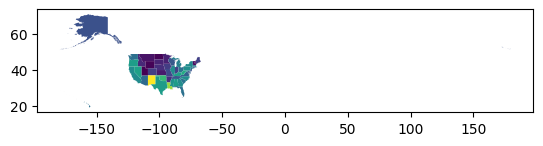

In [19]:
# plot the us
assistance.plot(
    column = "percent_assistance"
)

# it's a bit hard to see because of the non continental states

Text(0.5, 1.0, 'Percent of Households Receiving Public Assistance')

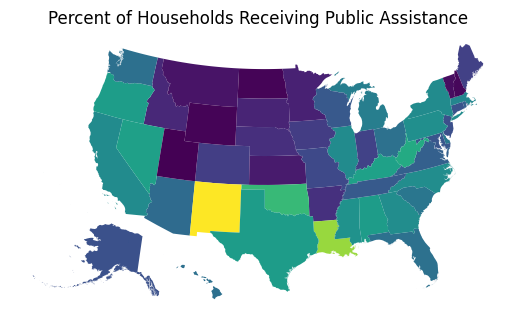

In [20]:
# use censusdis plot_us method to make it simpler
ax = cem.plot_us(
    assistance, 
    column = "percent_assistance",
)

ax.axis("off")
ax.set_title("Percent of Households Receiving Public Assistance")

Text(0.5, 1.0, 'Percent of Households Receiving Public Assistance')

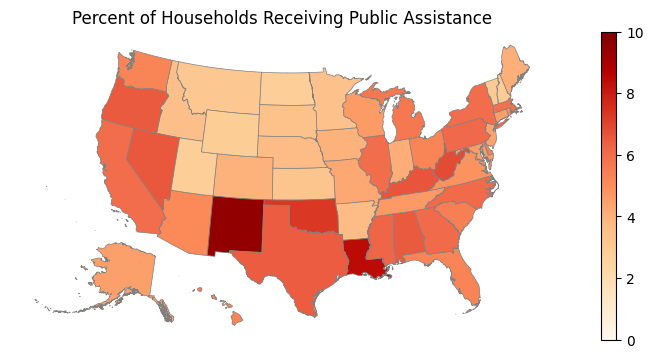

In [21]:
# use geopandas to make it look better
# https://geopandas.org/en/stable/docs/user_guide/mapping.html
ax = cem.plot_us(
    assistance, 
    column = "percent_assistance",
    legend = True,
    cmap = "OrRd", # from color brewer
    edgecolor = "gray",
    linewidth = 0.5,
    vmin = 0,
    vmax = 10,
    figsize = (12, 4)
)

ax.axis("off")
ax.set_title("Percent of Households Receiving Public Assistance")

---
---
---